In [25]:
#!pip install seaborn

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
sns.set(style="darkgrid", context="talk")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
plt.style.use("dark_background")



In [27]:
file_path = 'data/conversation_nps.csv'

Fix JSON and CSV filenames

In [28]:
import os
path = 'data/'
separator = '__'
items = [ name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))]

In [29]:
for i in items:
    path_to_items = path + i + '/'
    files = os.listdir(path_to_items)
    for filename in files:
        os.rename(path_to_items + filename, path_to_items + filename.replace('1_conversation_', '').split(separator,1)[0] + '.' + i)

Now we have all items with the same id pattern

In [30]:
for i in items:
    path_to_items = path + i + '/'
    files = os.listdir(path_to_items)
    #print(files)

In [31]:
df = pd.read_csv(file_path, header=None, usecols=[0,1], delimiter=';')
df = df.rename(columns={0: 'id', 1: 'rating'})

In [32]:
path_to_items

'data/json/'

In [33]:
vals = df.id.unique()
result = []
for root, dir, files in os.walk(path_to_items):
    for i in vals:
        if any(i in f for f in files):
            result.append(i)

In [34]:
len(result)

988

We have 988 files loaded in df that contains a phone register

In [35]:
df

,id,rating
0,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0
1,265f3b20-d426-4bcc-b46d-375b0e920532,5.0
2,26614192-7d2d-4518-b315-c0ca74014461,5.0
3,266580c7-5f96-428b-bfc9-1749a490cf35,5.0
4,26670455-d46e-4a03-9e70-1560992ff04f,NaN
...,...,...
996,3f333e1f-67b5-48db-9112-1fd036f952c8,NaN
997,3f363ffb-ce63-439c-a3dd-0458f25476b7,NaN
998,3f41cbb4-3d15-4134-8eac-97506e2cf340,NaN
999,3f59dd32-bd7c-47ed-a8ac-59af63a43a66,5.0


In [36]:
df.rating.value_counts()

5.0    272
4.0     19
1.0      9
3.0      4
2.0      2
Name: rating, dtype: int64

Merging CSV Files

In [37]:
path_to_csv = path + 'csv/'
path_to_csv

'data/csv/'

In [38]:
csv_files = os.listdir(path_to_csv)

In [39]:
filtered = []

for f in csv_files:
    data = pd.read_csv(
        path_to_csv + f,
        index_col=[0]
    )
    data['id'] = f.replace('.csv', '')
    filtered.append(data)

In [40]:
concated = pd.concat(filtered, ignore_index=True)

In [41]:
df.sample(3)

,id,rating
351,2f514895-37e1-4606-a5da-0bc6cb1ca4af,5.0
42,276d0fa8-5cd1-47aa-a5a8-b63308e9374b,NaN
576,34723b35-ec5f-48c4-a16a-942ee3ec5e34,5.0


In [42]:
concated.sample(3)

,start_time,end_time,speaker,comment,id
11422,0:03:57,0:03:57,ch_0,é ### Brasil #### #### ###,2a12164a-5e2b-4004-82a6-798173b37e53
34757,0:15:15,0:15:16,ch_1,Então tá certo. ## ótimo dia pra ti! Viu tudo ...,32cb9b8b-09f4-4778-888b-dba267767f33
1788,0:02:13,0:02:14,ch_1,certo?,272ae6a3-e61b-443c-bafd-5ff9cc074b6b


In [43]:
inner_df = pd.merge(df, concated, how='inner', on='id')

In [44]:
inner_df

,id,rating,start_time,end_time,speaker,comment
0,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:01,0:00:01,ch_1,sua chamada será encaminhada para ## de nossos...
1,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:12,0:00:13,ch_0,bom dia! Meu nome é #######
2,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:14,0:00:14,ch_1,tudo bem. ######! Como eu posso te ajudar?
3,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:18,0:00:19,ch_0,"O cartão, esse cartão ou conta jurídica? Ele t..."
4,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:31,0:00:31,ch_1,É Vamos dar uma olhadinha. Qual é o teu CPF?
...,...,...,...,...,...,...
68755,3f59dd32-bd7c-47ed-a8ac-59af63a43a66,5.0,0:27:04,0:27:04,ch_1,##### e #### ###### ####.
68756,3f59dd32-bd7c-47ed-a8ac-59af63a43a66,5.0,0:27:06,0:27:07,ch_0,##### e #### ###### Muito obrigado pela sua at...
68757,3f59dd32-bd7c-47ed-a8ac-59af63a43a66,5.0,0:27:08,0:27:10,ch_1,Eu que agradeço se puder no final ## ligação. ...
68758,3f59dd32-bd7c-47ed-a8ac-59af63a43a66,5.0,0:27:16,0:27:16,ch_0,"Tá, pode deixar que vou avaliá Muito obrigada,..."


## General NPS Analysis

In all dataset we just have 306 not-null values for nps-rating

In [45]:
df.rating.value_counts().sum()

306

In [46]:
inner_df.groupby('id').rating.first().value_counts().sum()

305

We have A LOT of 5 stars rating for our customer service

In [101]:
exp = df.copy()

In [140]:
exp.dropna(inplace=True, subset='rating')

Text(0.5, 1.0, 'Customers vs Rating')

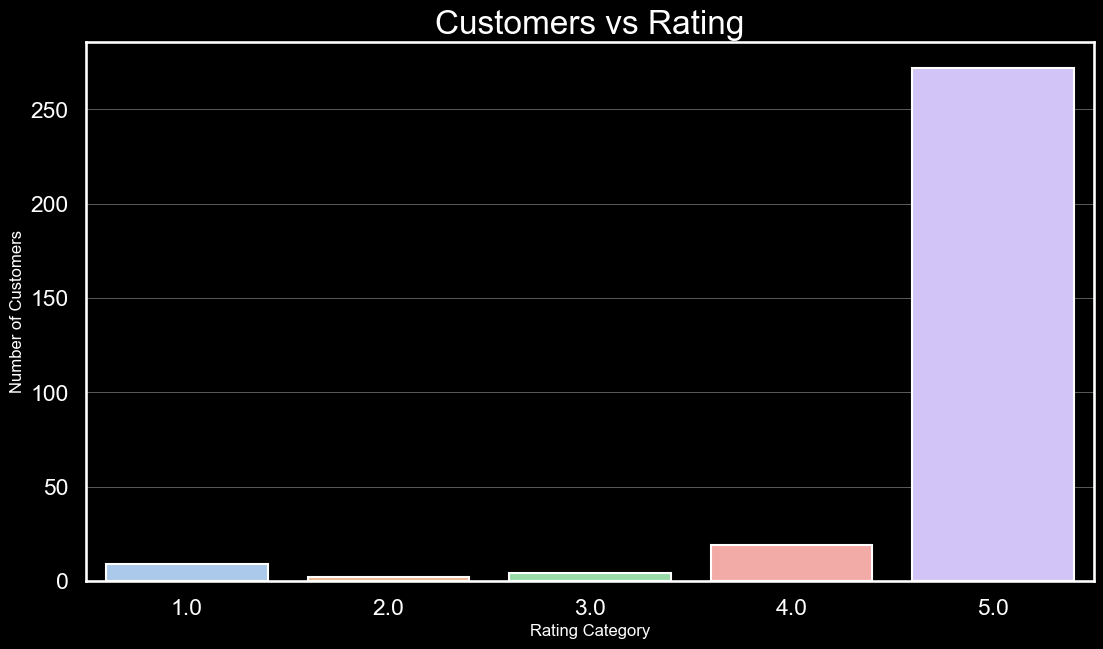

In [171]:
fig, ax = plt.subplots(figsize = (13,7))
sns.countplot(x='rating', data=df, palette="pastel")
ax.set_xlabel( "Rating Category" , size = 12)
ax.set_ylabel( "Number of Customers" , size = 12)
ax.set_title( "Customers vs Rating" , size = 24 )

In [142]:
new_rating = []
for row in exp['rating']:
    if row < 5.0:
        new_rating.append('Others')
    else:
        new_rating.append(5.0)
exp['unbalanced_rating'] = new_rating

In [143]:
exp.unbalanced_rating.value_counts()

5.0       272
Others     34
Name: unbalanced_rating, dtype: int64

Text(0.5, 1.0, 'Customers vs Rating Classification')

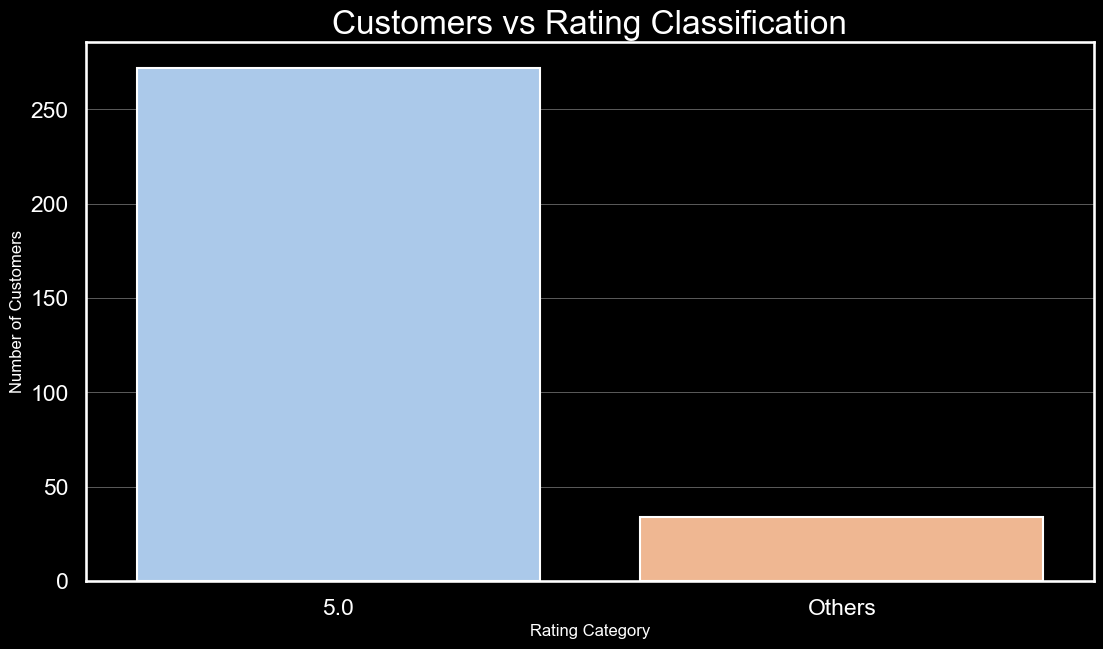

In [172]:
fig, ax = plt.subplots(figsize = (13,7))
sns.countplot(x='unbalanced_rating', data=exp, palette="pastel")
ax.set_xlabel( "Rating Category" , size = 12)
ax.set_ylabel( "Number of Customers" , size = 12)
ax.set_title( "Customers vs Rating Classification" , size = 24 )

In [145]:
nps_rating = []
for row in exp['rating']:
    if (row >= 4.0):
        nps_rating.append('Promoters')
    elif (row >= 3.0):
        nps_rating.append('Passive')
    else:
        nps_rating.append('Detractors')
exp['nps_rating'] = nps_rating

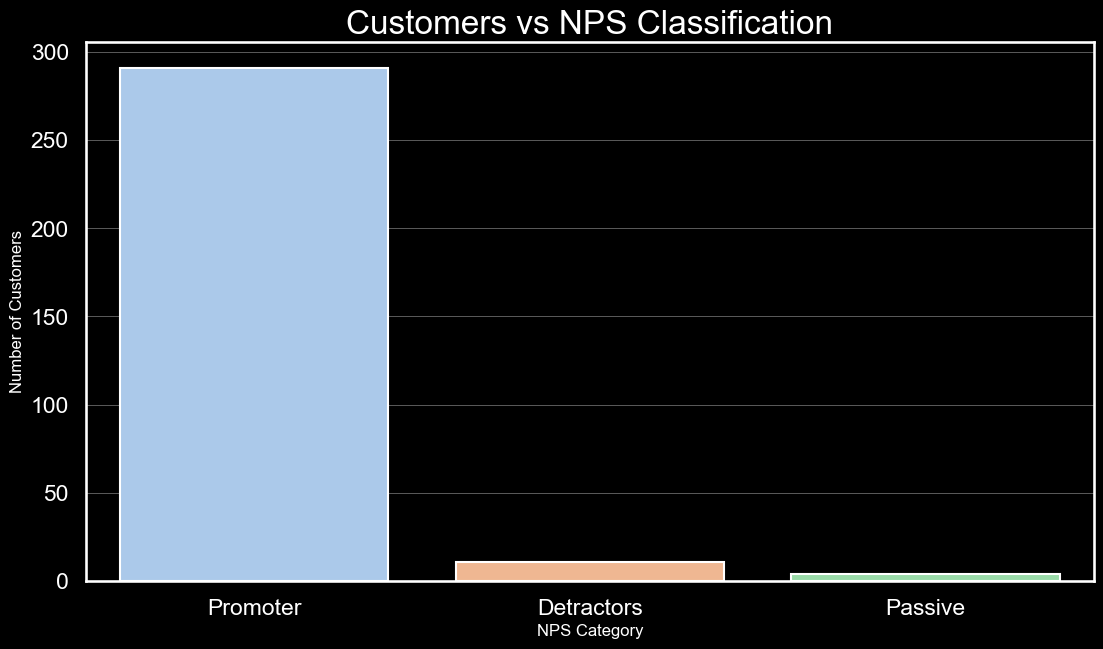

In [173]:
fig, ax = plt.subplots(figsize = (13,7))
sns.countplot(x='nps_rating', data=exp, palette="pastel")
ax.set_xlabel( "NPS Category" , size = 12)
ax.set_ylabel( "Number of Customers" , size = 12)
ax.set_title( "Customers vs NPS Classification" , size = 24 )
plt.show()


In [50]:
inner_df.head(1)

,id,rating,start_time,end_time,speaker,comment
0,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:01,0:00:01,ch_1,sua chamada será encaminhada para ## de nossos...


In [69]:
agg_funcs = {'rating' : 'first',
            'comment' : 'size', 
            'end_time': 'last' }

In [93]:
relation_rating_comment = inner_df.groupby('id').agg(agg_funcs).reset_index().dropna(subset='rating').rename(columns={'comment': 'number_comments', 'end_time': 'minutes'})
relation_rating_comment.minutes = pd.to_datetime(relation_rating_comment.minutes, format='%H:%M:%S').dt.minute

In [94]:
relation_rating_comment.sample(3)

,id,rating,number_comments,minutes
935,3dfec752-5686-409b-b033-d108f908df66,5.0,53,17
522,337d285e-bcb4-460d-8d18-f48ad5471af0,5.0,89,13
589,350c1099-850a-4aa4-8fa2-5782c104f0d1,1.0,75,10


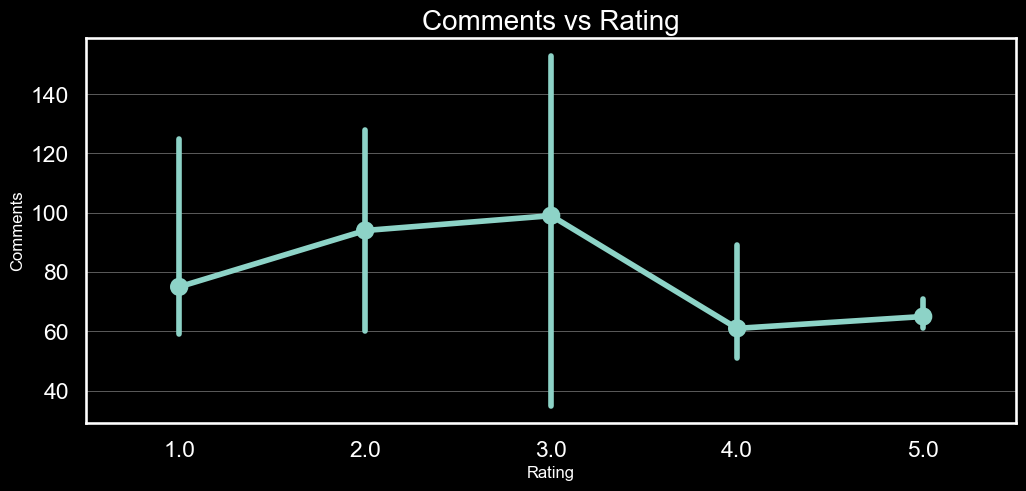

In [189]:
fig, ax = plt.subplots(figsize = (12,5))
sns.pointplot(data=relation_rating_comment, x='rating', y='number_comments', estimator='median')
ax.set_ylabel( "Comments" , size = 12)
ax.set_xlabel( "Rating" , size = 12)
ax.set_title( "Comments vs Rating" , size = 20 )
plt.show()

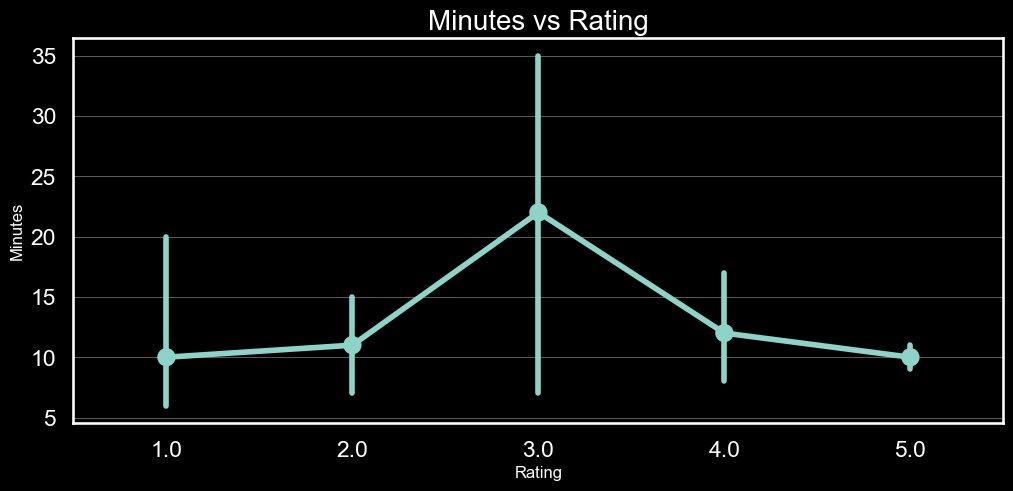

In [191]:
fig, ax = plt.subplots(figsize = (12,5))
sns.pointplot(data=relation_rating_comment, x='rating', y='minutes', estimator='median')
ax.set_ylabel( "Minutes" , size = 12)
ax.set_xlabel( "Rating" , size = 12)
ax.set_title( "Minutes vs Rating" , size = 20 )
plt.show()

In [68]:
inner_df[inner_df.id == '265e5551-7fc3-40d4-b4e5-18e15b1f714b']

,id,rating,start_time,end_time,speaker,comment
0,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:01,0:00:01,ch_1,sua chamada será encaminhada para ## de nossos...
1,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:12,0:00:13,ch_0,bom dia! Meu nome é #######
2,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:14,0:00:14,ch_1,tudo bem. ######! Como eu posso te ajudar?
3,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:18,0:00:19,ch_0,"O cartão, esse cartão ou conta jurídica? Ele t..."
4,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:31,0:00:31,ch_1,É Vamos dar uma olhadinha. Qual é o teu CPF?
...,...,...,...,...,...,...
80,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:10:58,0:10:58,ch_1,"Então, tá, Se tu puder aguardar pra avaliar o ..."
81,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:11:03,0:11:04,ch_0,tá jóia Brigada
82,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:11:04,0:11:05,ch_1,Obrigada. Tchau. Tchau
83,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:11:06,0:11:07,ch_0,Tchau
